## Applied Machine Learning, Module 1:  A simple classification task

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table('/content/fruit_data_with_colors.txt')

In [3]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
fruits.shape

(59, 7)

In [5]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [20]:
X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [21]:
X_train.shape

(44, 4)

In [22]:
y_train.shape

(44,)

In [23]:
X_test.shape

(15, 4)

In [24]:
y_test.shape

(15,)

In [25]:
X_train.head()

,height,width,mass,color_score
42,7.2,7.2,154,0.82
48,10.1,7.3,174,0.72
7,4.0,5.8,76,0.81
14,7.3,7.6,152,0.69
32,7.0,7.2,164,0.80


In [26]:
y_train.head()

42    3
48    4
7     2
14    1
32    3
Name: fruit_label, dtype: int64

In [27]:
X_test.head()

,height,width,mass,color_score
26,9.2,9.6,362,0.74
35,7.9,7.1,150,0.75
43,10.3,7.2,194,0.70
28,7.1,6.7,140,0.72
11,7.6,7.1,172,0.92


In [12]:
y_test.head()

26    3
35    3
43    4
28    3
11    1
Name: fruit_label, dtype: int64

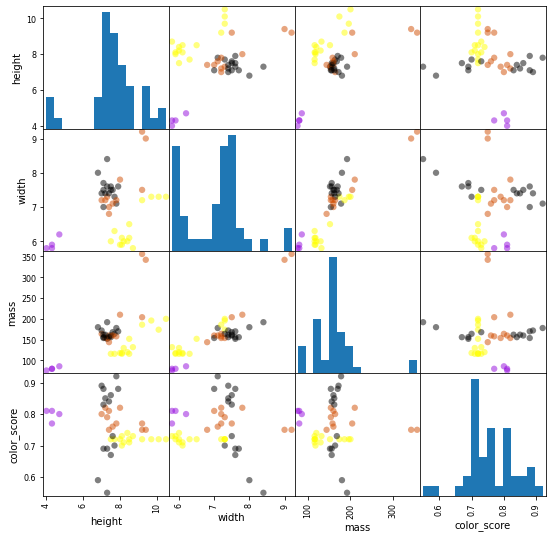

In [29]:
from matplotlib import cm

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c=y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

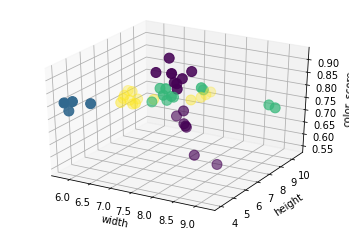

In [30]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

### Preparando dados para o modelo

In [39]:
X = fruits[['mass', 'height', 'width']]
y = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [40]:
X_train.shape

(47, 3)

In [42]:
X_test.shape

(12, 3)

In [43]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)

In [44]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [45]:
knn.score(X_test, y_test)

0.6666666666666666

In [35]:
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [36]:
fruit_prediction = knn.predict([[100, 6.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

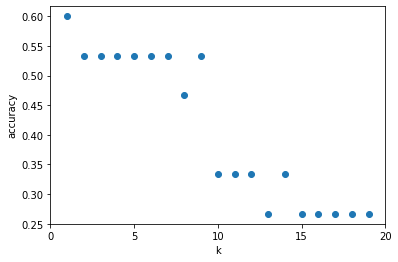

In [37]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

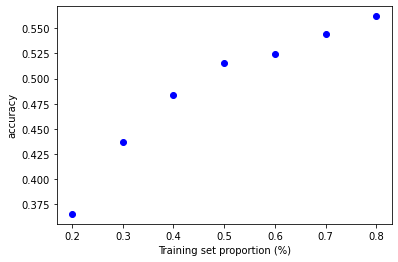

In [38]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');

This Nov. 2016 article by Zachary C. Lipton from the blog Approximately Correct discusses why and how automated processes for decision-making, particularly applications of machine learning, can exhibit bias in subtle and not-so-subtle ways. It's self-contained and includes a mini-review of machine learning concepts that reinforces what's covered in Module 1. This reading is optional for completion of the course.

http://approximatelycorrect.com/2016/11/07/the-foundations-of-algorithmic-bias/

